# Import de Bibliotecas

### Manipulação e visualização de dados

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from scipy.io import arff
from sklearn.cluster import AgglomerativeClustering

### Classes para pré-processamento

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

### Funções de avaliação dos modelos

In [46]:
from sklearn.metrics import (accuracy_score, 
                             confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             roc_curve,RocCurveDisplay,
                             f1_score, 
                             classification_report, 
                             mean_squared_error, 
                             r2_score,
                             precision_score)
from sklearn.model_selection import (train_test_split, 
                                     KFold, 
                                     LeaveOneOut, 
                                     StratifiedKFold, 
                                     GridSearchCV)

### Classes do modelo de aprendizado

In [47]:
from sklearn.naive_bayes import (GaussianNB, 
                                 BernoulliNB, 
                                 MultinomialNB)
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import (DecisionTreeClassifier, 
                          DecisionTreeRegressor, 
                          plot_tree)
from sklearn.svm import SVC

### Lib de Warnings

In [48]:
import warnings
warnings.filterwarnings('ignore')

### Declaração da variável com folder e arquivo do DATASET

In [49]:
folder_dataset = ('DATASET/dataset_6_letter.arff')

### Leitura do DATASET e respectivo print em tela

In [50]:
dataset, meta = arff.loadarff(folder_dataset)
dataset = pd.DataFrame(dataset)
dataset.head()
print(dataset)

       x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
0        2.0    4.0    4.0   3.0    2.0    7.0    8.0    2.0    9.0   11.0   
1        4.0    7.0    5.0   5.0    5.0    5.0    9.0    6.0    4.0    8.0   
2        7.0   10.0    8.0   7.0    4.0    8.0    8.0    5.0   10.0   11.0   
3        4.0    9.0    5.0   7.0    4.0    7.0    7.0   13.0    1.0    7.0   
4        6.0    7.0    8.0   5.0    4.0    7.0    6.0    3.0    7.0   10.0   
...      ...    ...    ...   ...    ...    ...    ...    ...    ...    ...   
19995    5.0   10.0    5.0   8.0    3.0    4.0   10.0    7.0    8.0   12.0   
19996    4.0    7.0    6.0   5.0    3.0    7.0    8.0    2.0   10.0   12.0   
19997    4.0    8.0    4.0   6.0    4.0    7.0    8.0    7.0    4.0   10.0   
19998    4.0   11.0    4.0   8.0    3.0    0.0    2.0    4.0    6.0    1.0   
19999    5.0    9.0    6.0  11.0    6.0    8.0    7.0    6.0    3.0    8.0   

       x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx class  
0      

### Distribuição das classes por Features

In [51]:
target_col = 'class'
print("Quantas classes existem nesse dataset?\n%d" %(len(dataset[target_col].unique())))
print("\nQuantas instâncias existem no dataset?\n%d" %(dataset.shape[0]))
print("\nQuantas features existem no dataset?\n%d" % (dataset.shape[1]-1))
print("\nQue features são essas?\n%s" % (str([k for k in dataset.keys() if k != target_col])))
print("\nQual o numero de instâncias por classe?")
print(dataset[target_col].value_counts())

Quantas classes existem nesse dataset?
26

Quantas instâncias existem no dataset?
20000

Quantas features existem no dataset?
16

Que features são essas?
['x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

Qual o numero de instâncias por classe?
b'U'    813
b'D'    805
b'P'    803
b'T'    796
b'M'    792
b'A'    789
b'X'    787
b'Y'    786
b'Q'    783
b'N'    783
b'F'    775
b'G'    773
b'E'    768
b'B'    766
b'V'    764
b'L'    761
b'R'    758
b'I'    755
b'O'    753
b'W'    752
b'S'    748
b'J'    747
b'K'    739
b'C'    736
b'H'    734
b'Z'    734
Name: class, dtype: int64


In [52]:
target_col = 'class'
s_dataset[target_col] = pd.factorize(s_dataset[target_col])[0]
print(dataset[target_col].value_counts())
print(s_dataset[target_col].value_counts())

b'U'    813
b'D'    805
b'P'    803
b'T'    796
b'M'    792
b'A'    789
b'X'    787
b'Y'    786
b'Q'    783
b'N'    783
b'F'    775
b'G'    773
b'E'    768
b'B'    766
b'V'    764
b'L'    761
b'R'    758
b'I'    755
b'O'    753
b'W'    752
b'S'    748
b'J'    747
b'K'    739
b'C'    736
b'H'    734
b'Z'    734
Name: class, dtype: int64
20    813
8     805
1     803
21    796
7     792
10    789
16    787
17    786
14    783
5     783
4     775
23    773
12    768
24    766
9     764
15    761
6     758
18    755
13    753
19    752
2     748
25    747
11    739
22    736
3     734
0     734
Name: class, dtype: int64


## Análise do dataset

In [53]:
#Arrays do Banco de dados
X = dataset.loc[:,"x-box":"yegvx"]
y = dataset.loc[:,[target_col]]

#Criando Dataset NORMALIZADO Z
s_dataset = dataset.copy(deep= True)
stdScaler = StandardScaler()
stdScaler.fit(X)
s_dataset.loc[:,"x-box":"yegvx"] = stdScaler.fit_transform(X,y=True)

#Analisando médias e desvio padrão do dataset não normalizado e normalizado
print (s_dataset.mean().max() - s_dataset.mean().min())
print (s_dataset.std().max() - s_dataset.std().min())

1.2133058446828215e-15
2.3514523661560816e-13


# SETUP INICIAL

In [54]:
#Refatorando varíaveis de saída do dataset padrão
dataset[target_col], classArray = pd.factorize(dataset[target_col])
print(classArray)

#Refatorando varíaveis de saída do dataset normalizado
s_dataset[target_col] = pd.factorize(s_dataset[target_col])[0]

#Verificando features
s_X = s_dataset.loc[:,"x-box":"yegvx"]
s_y = s_dataset.loc[:,[target_col]]
print(s_dataset[target_col].value_counts())

#Gerando objeto kfold
kFoldObj = KFold(n_splits=10,shuffle=True,random_state=169)

Index([b'Z', b'P', b'S', b'H', b'F', b'N', b'R', b'M', b'D', b'V', b'A', b'K',
       b'E', b'O', b'Q', b'L', b'X', b'Y', b'I', b'W', b'U', b'T', b'C', b'G',
       b'B', b'J'],
      dtype='object')
20    813
8     805
1     803
21    796
7     792
10    789
16    787
17    786
14    783
5     783
4     775
23    773
12    768
24    766
9     764
15    761
6     758
18    755
13    753
19    752
2     748
25    747
11    739
22    736
3     734
0     734
Name: class, dtype: int64


# Oversampling o banco de dados normalizado

In [55]:
smt = SMOTE(random_state=169)
X_smt, y_smt = smt.fit_resample(s_X,s_y)

print("Número de atributos (features): ", X_smt.drop([X_smt.columns[0]], axis = 1).shape[1])
print(X_smt.shape)

Número de atributos (features):  15
(21138, 16)


# Feature Selection (Extração de Caracteristicas)

## PCA

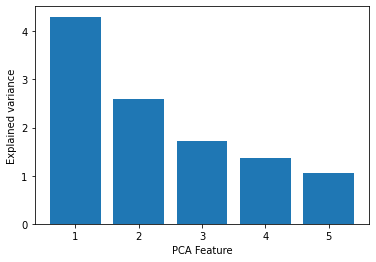

In [66]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_smt)

#Analisando os Vetores PCA
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )

plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.show()

## LDA

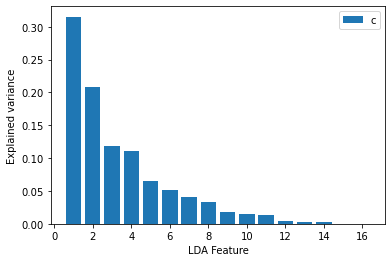

In [67]:
#LDA
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_smt,y_smt)

plt.bar(
    range(1,len(lda.explained_variance_ratio_)+1),
    lda.explained_variance_ratio_
    )

plt.xlabel('LDA Feature')
plt.ylabel('Explained variance')
plt.show()

## ANOVA

In [73]:
fs = SelectKBest(score_func=f_classif, k=16)
fs.fit(X_smt, y_smt)
X_train_fs = fs.fit_transform(X_smt,y_smt)

fs_table = pd.DataFrame()

fs_table["f valor"] = fs.scores_
fs_table["p valor"] = fs.pvalues_
fs_table[target_col] = y_smt[target_col]



print(fs_table.sort_values(["f valor", "p valor"], ascending=[False, False]))

        f valor       p valor  class
10  1304.820141  0.000000e+00      9
6   1236.208625  0.000000e+00      5
12  1143.589088  0.000000e+00     11
13   971.671816  0.000000e+00      8
11   967.041735  0.000000e+00     10
8    794.212217  0.000000e+00      7
14   679.016094  0.000000e+00      2
7    428.336500  0.000000e+00      6
5    373.760911  0.000000e+00      4
9    368.922218  0.000000e+00      8
15   299.643118  0.000000e+00      3
2    139.630300  0.000000e+00      2
4    117.110665  0.000000e+00      3
0     81.206347  0.000000e+00      0
3     10.952558  2.154672e-43      3
1      3.516696  6.560515e-09      1


# HIPERPARÂMETROS

## Definindo distância Customizada para KNN

In [15]:
def manhattan_custom_distance(x, y, weights=np.array([2, 1])):
    return (abs(x - y)*weights).sum()

#Arrays Hiperparametros
ks = [1]
distArray = ["manhattan"]

## Para MLP

In [16]:
n = [100]
learningRateInit = [0.0001]
learningRate= ['constant']

## DT

## NB

## SVM

# Treinamento do modelo

## TREINAMENTOS KNN

### KNN PCA

In [17]:
model = KNeighborsClassifier()
parameters = {'n_neighbors': ks,
                      'metric':distArray}

grid = GridSearchCV(estimator = model,
                    param_grid = parameters,
                    scoring = 'precision_macro',
                    cv = 3)
def evaluate_model_with_kfold(kf):
    precision_list = []
    fold = 0
    for train, test in kf.split(X_smt, y_smt):

        y_train, y_test = y_smt.iloc[train], y_smt.iloc[test]

        X_pca_train = pca.fit_transform(X_smt.iloc[train])
        X_pca_test = pca.transform(X_smt.iloc[test])

        grid.fit(X_pca_train, y_train)

        y_pred = grid.predict(X_pca_test)

        print("\nMelhor parametro:", grid.best_params_)
        print(classification_report(y_test, grid.predict(X_pca_test)))
        print("Fold %d: %.3f" %(fold, precision_score(y_test, y_pred,average="macro")))

        precision_list.append(precision_score(y_test, y_pred,average="macro"))
        print("Media do modelo ", precision_list[fold].mean())

        fold += 1

    precision = np.array(precision_list)
    print("\nPrecisão média (desvio): %.3f +- (%.3f)" %(precision.mean(), precision.std()))

# chamada da função de Treino com KFOLD
evaluate_model_with_kfold(kFoldObj)


Melhor parametro: {'metric': 'manhattan', 'n_neighbors': 1}
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        84
           1       0.66      0.70      0.68        71
           2       0.72      0.60      0.65        93
           3       0.72      0.60      0.66        91
           4       0.75      0.67      0.71        76
           5       0.82      0.85      0.83        86
           6       0.53      0.59      0.56        80
           7       0.89      0.94      0.92        69
           8       0.56      0.53      0.54        92
           9       0.85      0.93      0.88        95
          10       0.86      0.87      0.87        87
          11       0.66      0.75      0.70        77
          12       0.70      0.70      0.70        73
          13       0.60      0.62      0.61        85
          14       0.76      0.59      0.67        96
          15       0.85      0.87      0.86        94
          16       0


Melhor parametro: {'metric': 'manhattan', 'n_neighbors': 1}
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        82
           1       0.74      0.68      0.71        73
           2       0.74      0.71      0.72        76
           3       0.66      0.82      0.73        71
           4       0.67      0.83      0.74        70
           5       0.84      0.81      0.83        85
           6       0.68      0.64      0.66        92
           7       0.86      0.90      0.88        90
           8       0.46      0.50      0.48        72
           9       0.85      0.84      0.84        80
          10       0.85      0.89      0.87        84
          11       0.73      0.61      0.66       104
          12       0.74      0.68      0.71        85
          13       0.61      0.56      0.59        94
          14       0.62      0.63      0.62        67
          15       0.82      0.84      0.83        83
          16       0

### KNN LDA

In [19]:
model = KNeighborsClassifier()
parameters = {'n_neighbors': ks,
                      'metric':distArray}

grid = GridSearchCV(estimator = model,
                    param_grid = parameters,
                    scoring = 'precision_macro',
                    cv = 3)
def evaluate_model_with_kfold(kf):
    precision_list = []
    fold = 0
    for train, test in kf.split(X_smt, y_smt):

        y_train, y_test = y_smt.iloc[train], y_smt.iloc[test]

        X_lda_train = lda.fit_transform(X_smt.iloc[train],y_train)
        X_lda_test = lda.transform(X_smt.iloc[test])

        grid.fit(X_lda_train, y_train)

        y_pred = grid.predict(X_lda_test)

        print("\nMelhor parametro:", grid.best_params_)
        print(classification_report(y_test, grid.predict(X_lda_test)))
        print("Fold %d: %.3f" %(fold, precision_score(y_test, y_pred,average="macro")))

        precision_list.append(precision_score(y_test, y_pred,average="macro"))
        print("Media do modelo ", precision_list[fold].mean())

        fold += 1

    precision = np.array(precision_list)
    print("\nPrecisão média (desvio): %.3f +- (%.3f)" %(precision.mean(), precision.std()))

# chamada da função de Treino com KFOLD
evaluate_model_with_kfold(kFoldObj)


Melhor parametro: {'metric': 'manhattan', 'n_neighbors': 1}
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        84
           1       0.97      1.00      0.99        71
           2       1.00      0.96      0.98        93
           3       0.87      0.86      0.86        91
           4       0.99      0.96      0.97        76
           5       0.97      0.97      0.97        86
           6       0.94      0.93      0.93        80
           7       0.97      0.99      0.98        69
           8       0.95      0.97      0.96        92
           9       0.96      0.98      0.97        95
          10       1.00      0.99      0.99        87
          11       0.89      0.94      0.91        77
          12       0.95      0.96      0.95        73
          13       0.95      0.96      0.96        85
          14       0.99      0.95      0.97        96
          15       0.96      0.99      0.97        94
          16       0


Melhor parametro: {'metric': 'manhattan', 'n_neighbors': 1}
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        82
           1       0.96      0.95      0.95        73
           2       0.99      0.99      0.99        76
           3       0.86      0.93      0.89        71
           4       0.93      0.94      0.94        70
           5       0.99      0.95      0.97        85
           6       0.96      0.99      0.97        92
           7       1.00      1.00      1.00        90
           8       0.96      0.93      0.94        72
           9       0.99      0.97      0.98        80
          10       0.99      1.00      0.99        84
          11       0.96      0.90      0.93       104
          12       0.99      0.94      0.96        85
          13       0.97      0.97      0.97        94
          14       0.93      0.94      0.93        67
          15       0.98      0.98      0.98        83
          16       0

### KNN - ANOVA

In [21]:
model = KNeighborsClassifier()
parameters = {'n_neighbors': ks,
                      'metric':distArray}

grid = GridSearchCV(estimator = model,
                    param_grid = parameters,
                    scoring = 'precision_macro',
                    cv = 3)
def evaluate_model_with_kfold(kf):
    precision_list = []
    fold = 0
    for train, test in kf.split(X_smt, y_smt):

        y_train, y_test = y_smt.iloc[train], y_smt.iloc[test]

        X_anova_train = fs.fit_transform(X_smt.iloc[train],y_train)
        X_anova_test = fs.transform(X_smt.iloc[test])

        grid.fit(X_anova_train, y_train)

        y_pred = grid.predict(X_anova_test)

        print("\nMelhor parametro:", grid.best_params_)
        print(classification_report(y_test, grid.predict(X_anova_test)))
        print("Fold %d: %.3f" %(fold, precision_score(y_test, y_pred,average="macro")))

        precision_list.append(precision_score(y_test, y_pred,average="macro"))
        print("Media do modelo ", precision_list[fold].mean())

        fold += 1

    precision = np.array(precision_list)
    print("\nPrecisão média (desvio): %.3f +- (%.3f)" %(precision.mean(), precision.std()))

# chamada da função de Treino com KFOLD
evaluate_model_with_kfold(kFoldObj)


Melhor parametro: {'metric': 'manhattan', 'n_neighbors': 1}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       0.94      0.94      0.94        71
           2       0.99      0.98      0.98        93
           3       0.89      0.80      0.84        91
           4       0.93      0.92      0.93        76
           5       0.98      0.95      0.96        86
           6       0.90      0.89      0.89        80
           7       0.97      0.97      0.97        69
           8       0.91      0.93      0.92        92
           9       0.97      0.99      0.98        95
          10       1.00      1.00      1.00        87
          11       0.91      0.97      0.94        77
          12       0.97      0.95      0.96        73
          13       0.94      0.96      0.95        85
          14       0.99      0.97      0.98        96
          15       0.97      0.98      0.97        94
          16       0


Melhor parametro: {'metric': 'manhattan', 'n_neighbors': 1}
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        82
           1       0.99      0.90      0.94        73
           2       0.99      0.99      0.99        76
           3       0.90      0.90      0.90        71
           4       0.92      0.94      0.93        70
           5       0.98      0.96      0.97        85
           6       0.93      0.96      0.94        92
           7       0.99      1.00      0.99        90
           8       0.97      0.96      0.97        72
           9       0.96      0.97      0.97        80
          10       1.00      1.00      1.00        84
          11       0.97      0.88      0.92       104
          12       0.95      0.92      0.93        85
          13       0.95      0.94      0.94        94
          14       0.94      0.93      0.93        67
          15       0.96      0.99      0.98        83
          16       0

## TREINAMENTOS MLP

### MLP - PCA

In [18]:
model = MLPClassifier()
train_score = []
val_score = []

parameters = {'hidden_layer_sizes':n,
              'learning_rate': learningRate,
              'learning_rate_init': learningRateInit}

grid = GridSearchCV(estimator = model,
                    param_grid = parameters,
                    scoring = 'precision_macro',
                    cv = 2)

def evaluate_model_with_kfold(kf):
    precision_list = []
    fold = 0
    for train, test in kf.split(X_smt, y_smt):


        y_train, y_test = y_smt.iloc[train], y_smt.iloc[test]

        X_pca_train = pca.fit_transform(X_smt.iloc[train])
        X_pca_test = pca.transform(X_smt.iloc[test])

        grid.fit(X_pca_train, y_train)

        y_pred = grid.predict(X_pca_test)

        print("\nMelhor parametro:", grid.best_params_)
        print(classification_report(y_test, grid.predict(X_pca_test)))
        print("Fold %d: %.3f" %(fold, precision_score(y_test, y_pred,average="macro")))

        precision_list.append(precision_score(y_test, y_pred,average="macro"))
        print("Media do modelo ", precision_list[fold].mean())

        fold += 1

# chamada da função de Treino com KFOLD
evaluate_model_with_kfold(kFoldObj)


Melhor parametro: {'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.0001}
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        84
           1       0.65      0.70      0.68        71
           2       0.50      0.34      0.41        93
           3       0.62      0.38      0.48        91
           4       0.60      0.46      0.52        76
           5       0.73      0.70      0.71        86
           6       0.43      0.57      0.49        80
           7       0.69      0.91      0.79        69
           8       0.44      0.57      0.49        92
           9       0.73      0.81      0.77        95
          10       0.85      0.77      0.81        87
          11       0.71      0.51      0.59        77
          12       0.45      0.47      0.46        73
          13       0.50      0.64      0.56        85
          14       0.55      0.62      0.59        96
          15       0.75      


Melhor parametro: {'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.0001}
              precision    recall  f1-score   support

           0       0.67      0.68      0.68        82
           1       0.67      0.63      0.65        73
           2       0.49      0.41      0.45        76
           3       0.52      0.45      0.48        71
           4       0.62      0.47      0.54        70
           5       0.69      0.68      0.69        85
           6       0.42      0.41      0.42        92
           7       0.72      0.87      0.78        90
           8       0.38      0.58      0.46        72
           9       0.75      0.82      0.79        80
          10       0.91      0.76      0.83        84
          11       0.81      0.29      0.43       104
          12       0.60      0.42      0.50        85
          13       0.47      0.56      0.51        94
          14       0.38      0.55      0.45        67
          15       0.70      

### MLP - LDA

In [20]:
model = MLPClassifier()
train_score = []
val_score = []

parameters = {'hidden_layer_sizes':n,
              'learning_rate': learningRate,
              'learning_rate_init': learningRateInit}

grid = GridSearchCV(estimator = model,
                    param_grid = parameters,
                    scoring = 'precision_macro',
                    cv = 2)

def evaluate_model_with_kfold(kf):
    precision_list = []
    fold = 0
    for train, test in kf.split(X_smt, y_smt):

        y_train, y_test = y_smt.iloc[train], y_smt.iloc[test]

        X_lda_train = lda.fit_transform(X_smt.iloc[train],y_train)
        X_lda_test = lda.transform(X_smt.iloc[test])

        grid.fit(X_lda_train, y_train)

        y_pred = grid.predict(X_lda_test)

        print("\nMelhor parametro:", grid.best_params_)
        print(classification_report(y_test, grid.predict(X_lda_test)))
        print("Fold %d: %.3f" %(fold, precision_score(y_test, y_pred,average="macro")))

        precision_list.append(precision_score(y_test, y_pred,average="macro"))
        print("Media do modelo ", precision_list[fold].mean())

        fold += 1

    precision = np.array(precision_list)
    print("\nPrecisão média (desvio): %.3f +- (%.3f)" %(precision.mean(), precision.std()))

# chamada da função de Treino com KFOLD
evaluate_model_with_kfold(kFoldObj)


Melhor parametro: {'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.0001}
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        84
           1       0.96      0.96      0.96        71
           2       0.92      0.86      0.89        93
           3       0.83      0.82      0.83        91
           4       0.91      0.88      0.89        76
           5       0.92      0.92      0.92        86
           6       0.82      0.84      0.83        80
           7       0.93      0.96      0.94        69
           8       0.92      0.89      0.91        92
           9       0.96      0.95      0.95        95
          10       0.94      0.98      0.96        87
          11       0.92      0.90      0.91        77
          12       0.88      0.90      0.89        73
          13       0.88      0.89      0.89        85
          14       0.92      0.98      0.95        96
          15       0.97      


Melhor parametro: {'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.0001}
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        82
           1       0.94      0.84      0.88        73
           2       0.87      0.97      0.92        76
           3       0.85      0.89      0.87        71
           4       0.86      0.91      0.89        70
           5       0.91      0.93      0.92        85
           6       0.82      0.89      0.85        92
           7       1.00      0.96      0.98        90
           8       0.89      0.90      0.90        72
           9       0.94      0.95      0.94        80
          10       0.95      0.95      0.95        84
          11       0.93      0.92      0.93       104
          12       0.92      0.91      0.91        85
          13       0.94      0.88      0.91        94
          14       0.89      0.87      0.88        67
          15       0.99      

### MLP - ANOVA

In [22]:
model = MLPClassifier()
train_score = []
val_score = []

parameters = {'hidden_layer_sizes':n,
              'learning_rate': learningRate,
              'learning_rate_init': learningRateInit}

grid = GridSearchCV(estimator = model,
                    param_grid = parameters,
                    scoring = 'precision_macro',
                    cv = 2)

def evaluate_model_with_kfold(kf):
    precision_list = []
    fold = 0
    for train, test in kf.split(X_smt, y_smt):

        y_train, y_test = y_smt.iloc[train], y_smt.iloc[test]


        X_anova_train = fs.fit_transform(X_smt.iloc[train],y_train)
        X_anova_test = fs.transform(X_smt.iloc[test])

        grid.fit(X_anova_train, y_train)

        y_pred = grid.predict(X_anova_test)

        print("\nMelhor parametro:", grid.best_params_)
        print(classification_report(y_test, grid.predict(X_anova_test)))
        print("Fold %d: %.3f" %(fold, precision_score(y_test, y_pred,average="macro")))

        precision_list.append(precision_score(y_test, y_pred,average="macro"))
        print("Media do modelo ", precision_list[fold].mean())

        fold += 1

    precision = np.array(precision_list)
    print("\nPrecisão média (desvio): %.3f +- (%.3f)" %(precision.mean(), precision.std()))

# chamada da função de Treino com KFOLD
evaluate_model_with_kfold(kFoldObj)


Melhor parametro: {'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.0001}
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        84
           1       0.96      0.90      0.93        71
           2       0.89      0.81      0.85        93
           3       0.86      0.73      0.79        91
           4       0.86      0.84      0.85        76
           5       0.93      0.90      0.91        86
           6       0.81      0.82      0.82        80
           7       0.88      0.93      0.90        69
           8       0.90      0.87      0.88        92
           9       0.95      0.95      0.95        95
          10       0.91      0.95      0.93        87
          11       0.83      0.88      0.86        77
          12       0.82      0.79      0.81        73
          13       0.85      0.88      0.87        85
          14       0.92      0.95      0.93        96
          15       0.96      


Melhor parametro: {'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.0001}
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        82
           1       0.94      0.81      0.87        73
           2       0.78      0.89      0.83        76
           3       0.87      0.85      0.86        71
           4       0.81      0.90      0.85        70
           5       0.87      0.89      0.88        85
           6       0.81      0.90      0.86        92
           7       0.96      0.98      0.97        90
           8       0.85      0.88      0.86        72
           9       0.95      0.91      0.93        80
          10       0.93      0.96      0.95        84
          11       0.93      0.88      0.90       104
          12       0.80      0.85      0.82        85
          13       0.93      0.86      0.90        94
          14       0.88      0.91      0.90        67
          15       0.99      

## TREINAMENTOS DT

### DT - PCA

### DT - LCA

### DT - ANOVA

## TREINAMENTOS NB

### NB - PCA

### NB - LDA

### NB - ANOVA

## TREINAMENTOS SVM

### SVM - PCA

### SVM - LDA

### SVM - ANOVA